In [1]:
import pandas as pd
from Bio import SeqIO
import os

In [2]:
# latest paftol export and ENA sample accessions
# https://www.ebi.ac.uk/ena/submit/report/swagger-ui.html#/samples/findAllUsingGET_13
pft_file = '../PAFTOL_DB/2022-01-31_paftol_export_stats.csv'
cptree_file = 'cpTree_v6/cpTree_v6_tree.csv'
DataSource = 'PAFTOL' 
org_dir = 'C:/Data/PAFTOL/Organelles/'

In [3]:
## All Validated Samples
R = pd.read_csv(cptree_file)
R = R[R.DataSource==DataSource]
subset = R.Sample_Name.to_list()
print(R.shape[0],subset[:2])

3550 ['PAFTOL_004799', 'PAFTOL_000992']


## Load data and subset

In [4]:
pdir = DataSource + '/'
sdir = 'ENA_submissions/' + pdir
if not os.path.exists(sdir):
    os.makedirs(sdir)

In [78]:
# Load GetOrg result table
Org_df = pd.read_csv(org_dir + DataSource + '/' + DataSource + '_Organelle_Recovery.csv').astype({'idSequencing':'int'})
Org_df['Geseq_name'] = Org_df.Sample_Name.str.replace('PAFTOL_','Pis_')
print(Org_df.shape[0])
Org_df[:2]

9721


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Coverage_Kmer,Coverage_base,Run_Time,maxK,NRepeat_Pattern,NPath,Redo_FastPlast,error_pt,error_nr,Geseq_name
0,2,961,PAFTOL_000961,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,138795.0,...,59.4,90.7,329.43,105.0,NaN,NaN,False,NaN,NaN,Pis_000961
1,4,2571,PAFTOL_002571,Connaraceae,Oxalidales,Connaraceae,Rourea,minor,NaN,213954.0,...,18.5,60.2,747.57,105.0,NaN,NaN,False,NaN,NaN,Pis_002571


In [79]:
if subset is not None:
    Org_df = Org_df[Org_df.Sample_Name.isin(subset)]
    print(Org_df.shape[0])

3556


In [80]:
# Load paftol export and merge ena sample IDs
db = pd.read_csv(pft_file)
db = db[db.idPaftol.notnull()].astype({'idPaftol':'int','idSequencing':'int'})
# ena_samples = pd.read_csv(ena_file)
# ena_samples['idPaftol'] = ena_samples.alias.str.replace('_B','').str.split('_').str[-1].astype(int)
# db = pd.merge(db,ena_samples,how='left',on='idPaftol')
# db.columns
db = db[['idPaftol', 'DataSource', 'Project', 'Order', 'Family', 'Genus', 'Species', 'Taxonomical_Notes', 
         'ENASampleNum', 'idSequencing', 'ExternalSequenceID', 'ENAExpNumber',
       'ENARunNumber', 'NumReads', 'NumRecoveredGenes', 'SumContigLength']]
#        'title', 'taxId','id', 'alias', 'firstCreated', 'firstPublic', 'releaseStatus', 'secondaryId', 'scientificName', 'commonName']]
db[:2]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (29,35,45,57,68,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,idPaftol,DataSource,Project,Order,Family,Genus,Species,Taxonomical_Notes,ENASampleNum,idSequencing,ExternalSequenceID,ENAExpNumber,ENARunNumber,NumReads,NumRecoveredGenes,SumContigLength
0,1,PAFTOL,Asteraceae,Asterales,Asteraceae,Gymnolaena,sp.,Initially recorded as Gymnolaena litoralis but...,NaN,564,NaN,NaN,NaN,NaN,NaN,NaN
1,2,PAFTOL,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,ERS5501508,961,NaN,ERX4839538,ERR5033191,625228.0,332.0,138795.0


In [81]:
geseq_dir = sdir + 'fasta/'
if not os.path.exists(geseq_dir):
    os.makedirs(geseq_dir)

# Distribution of contigs

In [82]:
Org_df

,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Coverage_Kmer,Coverage_base,Run_Time,maxK,NRepeat_Pattern,NPath,Redo_FastPlast,error_pt,error_nr,Geseq_name
0,2,961,PAFTOL_000961,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,138795.0,...,59.4,90.7,329.43,105.0,NaN,NaN,False,NaN,NaN,Pis_000961
1,4,2571,PAFTOL_002571,Connaraceae,Oxalidales,Connaraceae,Rourea,minor,NaN,213954.0,...,18.5,60.2,747.57,105.0,NaN,NaN,False,NaN,NaN,Pis_002571
2,5,3409,PAFTOL_003409,Connaraceae,Oxalidales,Connaraceae,Rourea,emarginata,(=Roureopsis emarginata),202770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Pis_003409
3,6,960,PAFTOL_000960,Pilot,Caryophyllales,Dioncophyllaceae,Triphyophyllum,peltatum,NaN,176331.0,...,66.4,101.4,799.33,105.0,NaN,NaN,True,NaN,NaN,Pis_000960
4,9,3049,PAFTOL_003049,Achariaceae,Malpighiales,Achariaceae,Erythrospermum,zeylanicum,(=Erythrospermum phytolaccoides),233220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Pis_003049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,15264,29969,PAFTOL_029969,Lamiales,Lamiales,Plantaginaceae,Erinus,alpinus,[ARZ: DNA_ID listed instead of BankID; update...,NaN,...,11.4,36.6,519.91,105.0,NaN,NaN,False,NaN,NaN,Pis_029969
9677,15265,29971,PAFTOL_029971,Lamiales,Lamiales,Lamiaceae,Catoferia,chiapensis,[ARZ: DNA_ID listed instead of BankID; update...,NaN,...,61.0,195.9,443.79,105.0,NaN,NaN,False,NaN,NaN,Pis_029971
9681,15269,29979,PAFTOL_029979,Lamiales,Lamiales,Orobanchaceae,Lathraea,clandestina,[ARZ: DNA_ID listed instead of BankID; update...,NaN,...,33.0,106.0,2108.80,105.0,NaN,NaN,False,NaN,NaN,Pis_029979
9682,15269,30103,PAFTOL_030103,Lamiales,Lamiales,Orobanchaceae,Lathraea,clandestina,[ARZ: DNA_ID listed instead of BankID; update...,NaN,...,50.7,162.8,1415.34,105.0,NaN,NaN,True,NaN,NaN,Pis_030103


In [83]:
Seq_ls = []
for idx, row in Org_df.iterrows():
    for record in SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta', "fasta"):
        Seq_ls.append({'Sample_Name':row.Sample_Name,'SeqID':record.id,'SeqLen':len(record.seq)})

97490 3550
{0.1: 360.0, 0.5: 1058.0, 0.9: 4999.2} 0.9


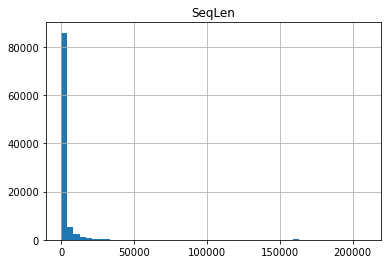

In [84]:
Seq_df = pd.DataFrame(Seq_ls)
print(Seq_df.shape[0], Seq_df.Sample_Name.nunique())
print(Seq_df.SeqLen.quantile([.1,.5,.9]).round(1).to_dict(),(Seq_df.SeqLen<5000).sum()/Seq_df.shape[0])
Seq_df.head(2)
Seq_df.hist(bins=50);

# Whole plastomes
### Annotation

In [85]:
whole_pt = Org_df[(Org_df.Assembly.isin(['circular genome','circular genome with gaps']) & (Org_df.Sum_len_pt>80000))]
print(whole_pt.shape[0],'samples',whole_pt.genus.nunique(),'genera')
whole_pt[:2]

338 samples 281 genera


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Coverage_Kmer,Coverage_base,Run_Time,maxK,NRepeat_Pattern,NPath,Redo_FastPlast,error_pt,error_nr,Geseq_name
0,2,961,PAFTOL_000961,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,138795.0,...,59.4,90.7,329.43,105.0,NaN,NaN,False,NaN,NaN,Pis_000961
6,11,12989,PAFTOL_012989,Achariaceae,Malpighiales,Achariaceae,Gynocardia,odorata,NaN,NaN,...,86.9,279.0,430.50,105.0,NaN,NaN,False,NaN,NaN,Pis_012989


In [86]:
# Output fasta files 
for idx, row in whole_pt.iterrows():
    seqs = list(SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta',format='fasta'))
    # Verif only 1 sequence
    if len(seqs) > 1:
        print('error, more than 1 sequence')
        pass
    seq = seqs[0]
    print(row.Sample_Name, row.Geseq_name, row.family, row.sci_name,len(seq),seq.seq.count('N'))
    seq.id = row.Geseq_name
    seq.description = ''
    SeqIO.write(seq, geseq_dir + row.Geseq_name + '.fasta',format='fasta')

PAFTOL_000961 Pis_000961 Circaeasteraceae Circaeaster agrestis 151079 0
PAFTOL_012989 Pis_012989 Achariaceae Gynocardia odorata 162812 0
PAFTOL_000973 Pis_000973 Aristolochiaceae Lactoris fernandeziana 159739 0
PAFTOL_000982 Pis_000982 Asteropeiaceae Asteropeia micraster 153227 0
PAFTOL_000915 Pis_000915 Cyrillaceae Cyrilla racemiflora 169862 0
PAFTOL_000920 Pis_000920 Hernandiaceae Hernandia nymphaeifolia 157713 0
PAFTOL_001000 Pis_001000 Ceratophyllaceae Ceratophyllum demersum 156179 0
PAFTOL_002827 Pis_002827 Fabaceae Stauracanthus boivinii 152836 0
PAFTOL_003547 Pis_003547 Fabaceae Tylosema esculentum 161538 0
PAFTOL_003843 Pis_003843 Schoepfiaceae Quinchamalium chilense 113830 0
PAFTOL_000754 Pis_000754 Alseuosmiaceae Alseuosmia banksii 155276 0
PAFTOL_000761 Pis_000761 Phyllonomaceae Phyllonoma laticuspis 154804 0
PAFTOL_003103 Pis_003103 Iridaceae Cobana guatemalensis 153510 0
PAFTOL_002566 Pis_002566 Fabaceae Platyosprion platycarpum 161140 0
PAFTOL_002635 Pis_002635 Fabaceae S

Submit files to GeSeq https://chlorobox.mpimp-golm.mpg.de/geseq.html and extract zip file in wdir/GeSeq_output

In [87]:
whole_pt.to_csv(sdir + DataSource + '_wholePT.csv',index=False)

In [88]:
# Rename and modify genbank files, convert to embl flat file
if not os.path.exists(pdir + '/GeSeq/Genbank_files/'):
    os.makedirs(pdir + '/GeSeq/Genbank_files/')
gb_files = [file for file in os.listdir(pdir + 'GeSeq/GeSeq_output/') if file.endswith('.gb')]
print(len(gb_files))
gb_files[:2]
for idx, row in whole_pt[:2].iterrows():
    idx_file = [i for i, x in enumerate([row.Geseq_name in file for file in gb_files]) if x]
    for index, record in enumerate(SeqIO.parse(pdir + 'GeSeq/GeSeq_output/' + gb_files[idx_file[0]], "genbank")):
        try:
            print(record.id)
            record.id = row.Sample_Name
            record.description = row.Sample_Name + ' chloroplast'
            record.annotations['accessions'] = list(db[db.idSequencing==row.idSequencing].id)[0]
            record.annotations['organism'] = row.sci_name
            record.annotations['taxonomy'] = ''
        #     print(record.annotations)
            SeqIO.write(record,pdir + '/GeSeq/Genbank_files/' + row.Sample_Name + '_pt.gb',format='genbank')
        except:
            print('issue with ',gb_files[idx_file[0]])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'PAFTOL/GeSeq/GeSeq_output/'

In [ ]:
record.features

### ENA submission
https://ena-docs.readthedocs.io/en/latest/submit/fileprep/assembly.html?highlight=chloroplast#

cd C:\Data\PAFTOL\GetOrganelles\ENA_submissions

In [ ]:
def del_features(embl_file, feat_del_ls = ['translation','info','annotator']):
    for rec in SeqIO.parse(embl_file, format ="embl"):
            if rec.features:
                for idx, feature in enumerate(rec.features):
                        for feat_to_del in feat_del_ls:
                            if feat_to_del in feature.qualifiers:
#                             print(idx, feature)
                                del rec.features[idx].qualifiers[feat_to_del]
    return rec
# for index, record in enumerate(SeqIO.parse(sdir + row.Sample_Name + '_pt.embl', "embl")):
#     print(record)
def gzip_file(in_file):
    import gzip
    import shutil
    f_gz = in_file + '.gz'
    with open(in_file, 'rb') as f_in:
        with gzip.open(f_gz, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [ ]:
print("cd C:/Data/PAFTOL/GetOrganelles/" + sdir)
for idx, row in whole_pt[:2].iterrows():
    ### Convert .gb to EMBL flat files
    file_gb = pdir + '/GeSeq/Genbank_files/' + row.Sample_Name + '_pt.gb'
    records = SeqIO.parse(file_gb, "genbank")
    SeqIO.write(records, sdir + row.Sample_Name + '.embl', "embl")
    out_embl_clean = del_features(sdir + row.Sample_Name + '.embl')
    SeqIO.write(out_embl_clean, sdir + row.Sample_Name + '.embl', "embl")
    gzip_file(sdir + row.Sample_Name + '.embl')
    ### Chromosome list file
    # https://ena-docs.readthedocs.io/en/latest/submit/fileprep/assembly.html?highlight=chloroplast#chromosome-list-file
    list_file=row.Sample_Name + '	PT	Circular-Chromosome	Chloroplast'
    with open(sdir + row.Sample_Name + '_CHR.txt', 'wb') as f:
        f.write(list_file.encode("ascii"))
    gzip_file(sdir + row.Sample_Name + '_CHR.txt')
    ### Manifest file 
    # https://ena-docs.readthedocs.io/en/latest/submit/assembly/genome.html 
    manifest_file = sdir + row.Sample_Name + '_manifest.txt'
    manifest={
    'STUDY':'PRJEB35285', #https://www.ncbi.nlm.nih.gov/bioproject/588607
    'SAMPLE':list(db[db.idSequencing==row.idSequencing].id)[0],
    'ASSEMBLYNAME':row.Sample_Name,
    'ASSEMBLY_TYPE':'clone or isolate',
    'COVERAGE':row.Coverage_base,
    'PROGRAM':'GetOrganelle v1.7.1 +  GeSeq 2.03',
    'PLATFORM':'ILLUMINA',
    'MOLECULETYPE':'genomic DNA',
    'FLATFILE': row.Sample_Name + '.embl.gz',
    'CHROMOSOME_LIST': row.Sample_Name + '_CHR.txt.gz',
    'DESCRIPTION': row.sci_name + ' chloroplast, complete genome'
    }
    manifest = pd.DataFrame.from_dict(manifest,orient='index')
    manifest.to_csv(manifest_file,header=None,sep='\t')
    
    # Submission command
    print('java -jar ../../webin-cli-3.7.0.jar -username Webin-52995 -passwordFile ../../ena_pwd.txt -context genome -manifest ' \
          + row.Sample_Name + '_manifest.txt' + ' -validate') 

# Contigs

In [89]:
contigs_pt = Org_df[(Org_df.Assembly.isin(['circular genome','circular genome with gaps'])==False) &
                   (Org_df.pt_recovered==True)]
print(contigs_pt.shape[0],'samples',contigs_pt.genus.nunique(),'genera')
contigs_pt[:2]

3218 samples 2639 genera


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Coverage_Kmer,Coverage_base,Run_Time,maxK,NRepeat_Pattern,NPath,Redo_FastPlast,error_pt,error_nr,Geseq_name
1,4,2571,PAFTOL_002571,Connaraceae,Oxalidales,Connaraceae,Rourea,minor,NaN,213954.0,...,18.5,60.2,747.57,105.0,NaN,NaN,False,NaN,NaN,Pis_002571
2,5,3409,PAFTOL_003409,Connaraceae,Oxalidales,Connaraceae,Rourea,emarginata,(=Roureopsis emarginata),202770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Pis_003409


In [90]:
# Output fasta files
min_len = 50000
contigs_pt['Np_contigs'] = 0; contigs_pt['Sump_contigs'] = 0;
for idx, row in contigs_pt.iterrows():
    for seq in SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta',format='fasta'):
        # if longer than
        if len(seq) > min_len:
            if '--' in seq.id:
                seq.id = row.Geseq_name + '-' + seq.id.split('--')[0]
            elif 'circular' in seq.id:
                seq.id = row.Geseq_name + '-' + 'scaffold_circular'
            seq.description = ''
            SeqIO.write(seq, geseq_dir + seq.id + '.fasta',format='fasta')
            contigs_pt.loc[idx,'Np_contigs'] += 1; contigs_pt.loc[idx,'Sump_contigs'] += len(seq)
    if contigs_pt.loc[idx,'Np_contigs']>0:
        print(row.Sample_Name, row.Geseq_name, row.family, row.sci_name,row.Sum_len_pt,
              contigs_pt.loc[idx,'Np_contigs'],contigs_pt.loc[idx,'Sump_contigs'])

C:\Users\kle10kg\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


PAFTOL_000960 Pis_000960 Dioncophyllaceae Triphyophyllum peltatum 141085.0 1 141085
PAFTOL_000946 Pis_000946 Zygophyllaceae Zygophyllum fabago 103382.0 1 103382
PAFTOL_002855 Pis_002855 Sapindaceae Mischocarpus pyriformis 159966.0 1 77746
PAFTOL_003064 Pis_003064 Sapindaceae Sapindus saponaria 158958.0 1 91365
PAFTOL_000933 Pis_000933 Hydroleaceae Hydrolea sp. 134268.0 1 84379
PAFTOL_001044 Pis_001044 Vahliaceae Vahlia capensis 155901.0 1 153939
PAFTOL_001065 Pis_001065 Montiaceae Calandrinia ciliata 154282.0 1 154282
PAFTOL_003429 Pis_003429 Fabaceae Schleinitzia insularum 168561.0 1 168561
PAFTOL_001055 Pis_001055 Hydrostachyaceae Hydrostachys multifida 146537.0 1 76142
PAFTOL_012993 Pis_012993 Achariaceae Baileyoxylon lanceolatum 160163.0 1 81090
PAFTOL_000998 Pis_000998 Amborellaceae Amborella trichopoda 159455.0 2 159455
PAFTOL_002853 Pis_002853 Iridaceae Ennealophus euryandrus 126298.0 1 82315
PAFTOL_002889 Pis_002889 Iridaceae Eleutherine latifolia 151380.0 1 102540
PAFTOL_00312

In [91]:
contigs_pt = contigs_pt[contigs_pt.Np_contigs>0]
print(contigs_pt.Np_contigs.sum(), contigs_pt.shape[0],'samples',contigs_pt.genus.nunique(),'genera')
contigs_pt.to_csv(sdir + DataSource + '_contigsPT.csv',index=False)

321 287 samples 271 genera


# rDNA

get webin client https://github.com/enasequence/webin-cli